# Example: Plotting Decision Boundaries

In the example below we use all the libraries introduced in the lecture in order to plot the decision boundaries of a KNN classifier.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

## The Data

We start by creating a dataset of random points (`X`), with 2 features, randomly assigned to one of two classes, 0 or 1 (`y`).

In [135]:
N = 50

X = np.random.rand(N, 2)
y = np.random.randint(2, size=N)

print("Example: The 10th point", X[9], "has label", y[9])

Example: The 10th point [0.16550706 0.19111386] has label 1


The simple scatterplot below shows the original points. It is possible to visualize them in 2D because they only have 2 features, so each column is mapped to one axis (column 0 to x and column 1 to y).

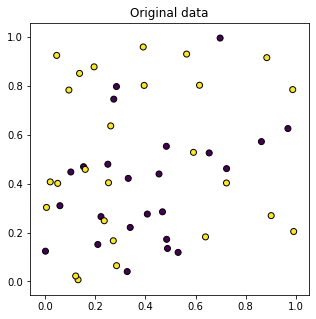

In [192]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.title("Original data")
plt.show()

## The Boundaries

The idea of a decision boundary plot is to inspect *roughly* how a trained classifier is working and what are the "boundaries" of each class. For that, we build a 2D grid, classify all the grid cells (as if the grid cells were the *test* data), then plot the results using colors. 

First, we build the classifier that we want to inspect. We are going to start with a KNN classifier. It is trained with the actual data that we generated above.

In [137]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Now we build the grid of cells that we will classify. The variables `x_axis` and `y_axis` contain arrays of evenly-spaced values between the minimum and the maximum of each of the two columns of the data. When combined, they can generate a grid of cells that works as a *bounding box* of the data points, i.e. it includes all the data points and all the space in-between them.

The `size` determines the *granularity* of the grid. The larger the size, the finer the grid is (i.e. there are more cells in it), so it looks better. However, too many cells will make the classification process slower.

In [207]:
min_x, max_x = min(X[:, 0]), max(X[:, 0])
min_y, max_y = min(X[:, 1]), max(X[:, 1])
grid_size = 100
x_axis = np.linspace(min_x, max_x, grid_size)
y_axis = np.linspace(min_y, max_y, grid_size)

Now we classify all the grid cells with our trained classifier. That means each grid cell will be assigned a class label, as if they were actual data points. In order to do that, we traverse both axes, generate each cell, classify it, and assign the results to the `grid`. Remember that `enumerate` gives, in each iteration, both the index (`ix`, `iy`) and the value (`vx`, `vy`) of each axis. The indexes are used to locate the cells, and the values are used to classify them.

**Note**: we are doing this in an over-simplified, easy-to-read manner, by looping over the values of the x and y axis of the grid. This is very slow, so at the end of this notebook I will show how to optimize the process.

In [208]:
grid = np.zeros(shape=(len(x_axis), len(y_axis)))

for ix, vx in enumerate(x_axis):
    for iy, vy in enumerate(y_axis):
        grid[ix, iy] = knn_clf.predict([[vx, vy]])

#grid

The resulting grid (and, thus, the decision boundaries) is plotted below, with the actual data points on top, for comparison. We adjust the `imshow` call a little bit in order to match the positions of the grid cells and the points, and change the edge colors of the circles to make them more visible.

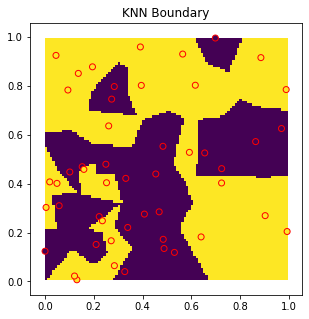

In [209]:
plt.figure(figsize=(5,5))
plt.imshow(grid.T, origin='lower', extent=(min_x, max_x, min_y, max_y))
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='r')
plt.title("KNN Boundary")
plt.show()

## Full and Optimized Solution

The cell below contains the full code for generating the plot. The functions `make_grid_loop` and `make_grid_opt` both build the same grid, the first using the presented loop-based solution (slow) and the second using an optimized numpy-based solution (fast). You can replace the comment and run the cell again in order to get a feeling for the difference in the performance.

In [ ]:
N = 50

X = np.random.rand(N, 2)
y = np.random.randint(2, size=N)

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X, y)

min_x, max_x = min(X[:, 0]), max(X[:, 0])
min_y, max_y = min(X[:, 1]), max(X[:, 1])
grid_size = 100
x_axis = np.linspace(min_x, max_x, grid_size)
y_axis = np.linspace(min_y, max_y, grid_size)

def make_grid_loop(x_axis, y_axis):
    grid = np.zeros(shape=(len(x_axis), len(y_axis)))
    for ix, vx in enumerate(x_axis):
        for iy, vy in enumerate(y_axis):
            grid[ix, iy] = knn_clf.predict([[vx, vy]])    
    return grid.T

def make_grid_opt(x_axis, y_axis):
    xx, yy = np.meshgrid(x_axis, y_axis)
    cells = np.stack([xx.ravel(), yy.ravel()], axis=1)
    grid = knn_clf.predict(cells).reshape(grid_size, grid_size)
    return grid

# Replace the comment below to test the performance of the two solutions
grid = make_grid_loop(x_axis, y_axis)
#grid = make_grid_opt(x_axis, y_axis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
ax1.set_aspect('equal', 'box')
ax1.title("Original data")

ax2.imshow(grid, origin='lower', extent=(min_x, max_x, min_y, max_y))
ax2.scatter(X[:,0], X[:,1], c=y, edgecolors='r')
ax2.title("Decision boundaries")

plt.show()